# Rainfall visualisations 

Some imports to provide the drop-down menus, and work with the data

In [1]:
%matplotlib notebook
import json
import pathlib

import ipywidgets as widgets

from utils import (
    aggregate_data,
    get_start_end_years,
    load_data,
    plot,
    record_high,
    split_data,
)

Set up the path to the scraped CSV files, and then load the station details into `stations`

In [2]:
csv_directory = pathlib.Path('data/daily/csvs')

with open('data/stations.json', 'rt') as f:
    stations = json.load(f)

## User options

In [3]:
county = widgets.Dropdown(
    options=stations.keys(),
    value='Monaghan',
    description='County',
    disabled=False,
)
county

Dropdown(description='County', index=17, options=('Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Ga…

In [4]:
station = widgets.Dropdown(
    options=[s['station'] for s in stations[county.value]],
    description='Station',
    disabled=False,
)
station

Dropdown(description='Station', options=('CARRICKMACROSS (DUNOGE)', 'CASTLEBLANEY_Coose', 'CLONES (DUNSEARK)',…

In [5]:
agg = widgets.RadioButtons(
    options=['mean', 'max'],
    description='Aggregation',
)
agg

RadioButtons(description='Aggregation', options=('mean', 'max'), value='mean')

In [6]:
timescale = widgets.RadioButtons(
    options=['day', 'week', 'month'],
    description='Timescale'
)
timescale

RadioButtons(description='Timescale', options=('day', 'week', 'month'), value='day')

## Aggregate and plot the data

Historic data from: 1984–2007
Record high recorded 187 days in the past decade


<IPython.core.display.Javascript object>


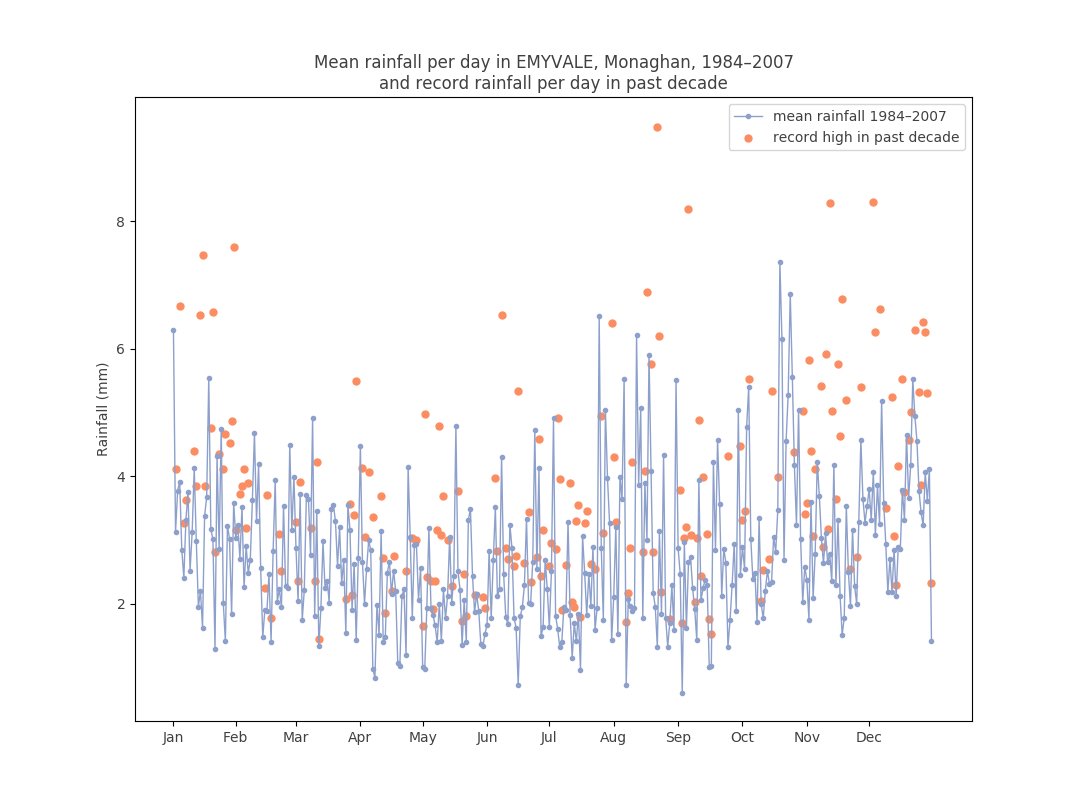

In [7]:
# s is the chosen weather station
s = stations[county.value][station.index]
# construct the path to the data file
fpath = csv_directory / s['filename']

# load the DataFrame
df = load_data(fpath, station=s)

# split the data into the past decade, and everything else
last_decade, historic = split_data(df, cutoff_year=2008)

# get the start and end years for the historic data
start_end_year = get_start_end_years(historic)
print(f'Historic data from: {start_end_year[0]}–{start_end_year[1]}')


# aggregate the two DataFrames based on the timescale selected above
historic_agg = aggregate_data(historic, timescale=timescale.value)
last_decade_agg = aggregate_data(last_decade, timescale=timescale.value)

# get a DataFrame with the record-breaking highs
rec_high = record_high(last_decade_agg, historic_agg, agg=agg.value)

# print out the number of record-breaking days, weeks, or months
ess = 's' if rec_high.shape[0] > 1 else ''
in_on = 'in' if timescale.value == 'month' else 'on'
print(f'Record high recorded {rec_high.shape[0]} {timescale.value}{ess} in the past decade')

# plot the data
plot(
    historic_agg,
    last_decade_agg,
    rec_high,
    aggregation=agg.value,
    timescale=timescale.value,
    start_end_year=start_end_year,
    station=station.value,
    county=county.value,
)